In [59]:
import pandas as pd
import matplotlib
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Import our data! 

link to our data 
[kaggle](https://www.kaggle.com/datasets/kemical/kickstarter-projects?select=ks-projects-201801.csv)

In [60]:
kick_starter = pd.read_csv('ks-projects-201801.csv')

## Import our other data set

In [61]:
ks2 = pd.read_csv("ks-projects-201612.csv", encoding='latin1', low_memory=False)

In [62]:
ks2.head(1)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN


In [63]:
ks2.tail(1)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
323749,999988282,Nou Renmen Ayiti! We Love Haiti!,Performance Art,Art,USD,2011-08-16 09:07:47,2000,2011-07-19 09:07:47,524,failed,17,US,524,NaN,NaN,NaN,NaN


In [64]:
# Displaying the size and data types of our data
df_shape = ks2.shape
print(f'The DataFrame has {df_shape[0]} rows and {df_shape[1]} columns! \n')
print(ks2.info())

The DataFrame has 323750 rows and 17 columns! 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323750 entries, 0 to 323749
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              323750 non-null  int64  
 1   name            323746 non-null  object 
 2   category        323745 non-null  object 
 3   main_category   323750 non-null  object 
 4   currency        323750 non-null  object 
 5   deadline        323750 non-null  object 
 6   goal            323750 non-null  object 
 7   launched        323750 non-null  object 
 8   pledged         323750 non-null  object 
 9   state           323750 non-null  object 
 10  backers         323750 non-null  object 
 11  country         323750 non-null  object 
 12  usd pledged     319960 non-null  object 
 13  Unnamed: 13     625 non-null     object 
 14  Unnamed: 14     12 non-null      object 
 15  Unnamed: 15     4 non-null       object 
 16  Unnamed:

In [65]:
# checking to see if any values are null in data 
print(ks2.isnull().any().any())

True


In [66]:
# Getting a count of null values in each column  
ks2.isnull().sum()

ID                     0
name                   4
category               5
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3790
Unnamed: 13       323125
Unnamed: 14       323738
Unnamed: 15       323746
Unnamed: 16       323749
dtype: int64

In [67]:
# getting column names
ks2.columns

Index(['ID ', 'name ', 'category ', 'main_category ', 'currency ', 'deadline ',
       'goal ', 'launched ', 'pledged ', 'state ', 'backers ', 'country ',
       'usd pledged ', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16'],
      dtype='object')

In [69]:
pd.options.display.float_format = '{:,.2f}'.format
ks2.describe()

,ID,Unnamed: 16
count,"323,750.00",1.00
mean,"1,074,942,564.82",25.00
std,"619,335,210.13",NaN
min,"5,971.00",25.00
25%,"537,580,176.00",25.00
50%,"1,075,818,379.00",25.00
75%,"1,611,070,301.75",25.00
max,"2,147,476,221.00",25.00


In [70]:
def clean_ks(kick_starter) -> pd.DataFrame:
    # Clean column names
    kick_starter.columns = kick_starter.columns.str.title()
    kick_starter.columns = kick_starter.columns.str.strip().str.replace('_', ' ')
    
    # Drop unnecessary columns
    cols_to_drop = ['Id', 'Deadline', 'Launched']
    kick_starter = kick_starter.drop(columns=cols_to_drop)
    
    # Drop rows with missing values
    kick_starter = kick_starter.dropna()
    
    # Return the cleaned DataFrame
    return kick_starter

In [71]:
# calling our function to clean our data
kick_starter_cleaned = clean_ks(kick_starter)
kick_starter_cleaned.head()


,Name,Category,Main Category,Currency,Goal,Pledged,State,Backers,Country,Usd Pledged,Usd Pledged Real,Usd Goal Real
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,"1,000.00",0.00,failed,0,GB,0.00,0.00,"1,533.95"
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,"30,000.00","2,421.00",failed,15,US,100.00,"2,421.00","30,000.00"
2,Where is Hank?,Narrative Film,Film & Video,USD,"45,000.00",220.00,failed,3,US,220.00,220.00,"45,000.00"
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,"5,000.00",1.00,failed,1,US,1.00,1.00,"5,000.00"
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,"19,500.00","1,283.00",canceled,14,US,"1,283.00","1,283.00","19,500.00"


In [72]:
def filter_by_country(kick_starter: DataFrame, country: str) -> DataFrame:
    """
    Filters the Kickstarter dataset to include only rows for a specific country.

    Parameters:
        kick_starter (pandas.DataFrame): The Kickstarter dataset containing a 'Country' column.
        country (str): The country to filter the dataset by.

    Returns:
        pandas.DataFrame: A filtered DataFrame containing only rows where the 'Country' column matches the specified country.
    """
    return kick_starter[kick_starter['Country'] == country]

In [73]:
kick_starter_filtered = filter_by_country(kick_starter_cleaned, "US")
kick_starter_filtered.head(1)

,Name,Category,Main Category,Currency,Goal,Pledged,State,Backers,Country,Usd Pledged,Usd Pledged Real,Usd Goal Real
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,"30,000.00","2,421.00",failed,15,US,100.00,"2,421.00","30,000.00"


In [74]:
def summarize_backers(kick_starter: DataFrame) -> str:
    """
    Calculates and summarizes the total, mean, and median number of backers 
    from a Kickstarter dataset.

    Parameters:
        kick_starter (pandas.DataFrame): The Kickstarter dataset containing a 
                                         'Backers' column.

    Returns:
        str: A formatted string summarizing the total, mean (rounded to 2 decimal places),
             and median number of backers.
    """
    # Calculate total, mean, and median backers
    backer_sum = kick_starter['Backers'].sum()
    backer_mean = kick_starter['Backers'].mean().round(2)
    backer_median = kick_starter['Backers'].median()

    # Return a formatted string
    return (f"The total number of backers is {backer_sum}.\n"
            f"The mean number of backers is {backer_mean}.\n"
            f"The median number of backers is {backer_median}.")


In [75]:
# Calling the function from above and printing it.  
summary = summarize_backers(kick_starter)
print(summary)

The total number of backers is 39993219.
The mean number of backers is 105.62.
The median number of backers is 12.0.


---

In [76]:
def category_backers_summary(kick_starter: DataFrame) -> DataFrame:
    """
    Analyzes the Kickstarter dataset by grouping the data by category and summing the backers. 
    It then finds the category with the most backers, sorts the values, and returns a sorted DataFrame.

    Parameters:
        kick_starter (pandas.DataFrame): The Kickstarter dataset containing a 'Category' and 'Backers' column.

    Returns:
        pandas.DataFrame: A DataFrame containing categories and their summed backers, sorted in descending order by backers.
    """
    # Group by Category and sum the backers
    category_backers = kick_starter.groupby('Category')['Backers'].sum().reset_index()

    # Find the category with the most backers
    most_backers_category = category_backers['Backers'].idxmax()
    most_backers = category_backers['Backers'].max()

    # Sort the values by 'Backers'
    category_backers = category_backers.sort_values(by='Backers', ascending=False)

    return category_backers


# Plotting!

In [77]:
# Call our function and be sure to use kick_starter_filtered to call it. 
category_backers_summary = category_backers_summary(kick_starter_filtered)



In [78]:
# category_backers_summary.tail(10)
category_backers_summary.tail(10)

,Category,Backers
155,Workshops,2638
64,Glass,2153
122,Residencies,2113
83,Literary Spaces,2098
150,Weaving,2074
118,Quilts,1665
31,Couture,1508
33,Crochet,952
43,Embroidery,902
137,Taxidermy,326


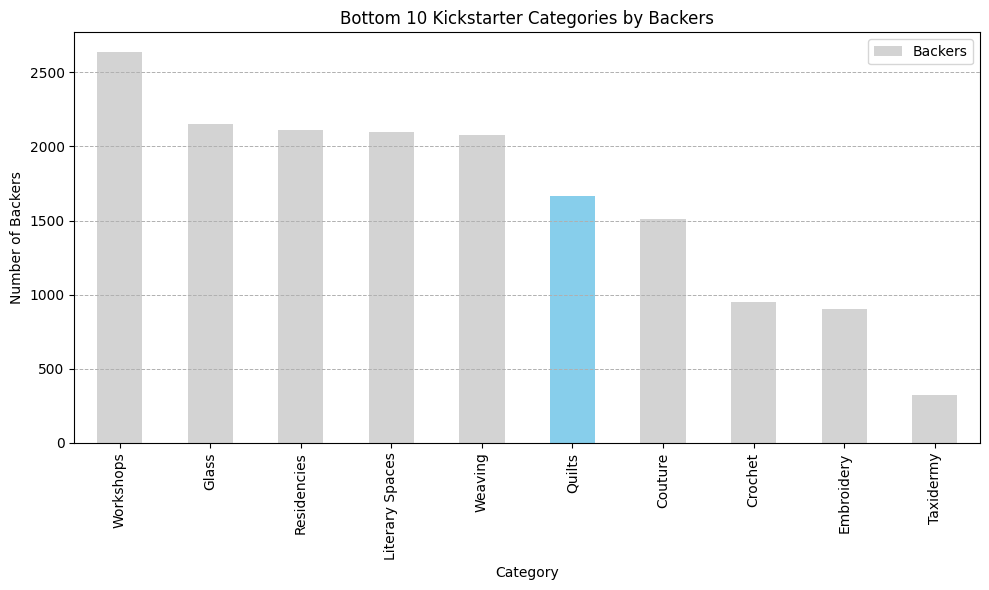

In [79]:
categories = cat_tail['Category']
colors = ['lightgrey' if category != 'Quilts' else 'skyblue' for category in categories]
cat_tail.plot(kind='bar', x='Category', y='Backers', rot=90, color=colors, figsize=(10,6))

# Add title and axis labels
plt.title('Bottom 10 Kickstarter Categories by Backers')
plt.xlabel('Category')
plt.ylabel('Number of Backers')

# Add gridlines for better readability
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)

# Show the plot
plt.tight_layout()
# plt.savefig('quilting.jpg') # optional to save the plot
plt.show()

# saves chart
# cat_tail.to_csv('chart.csv', index=False)


# reference code

In [80]:
# Filter the DataFrame for successful projects
filtered_data = kick_starter[kick_starter['State'] == 'successful']

# Group by Category and State and sum the specified columns
top_ten_cats = filtered_data.groupby(['Category', 'State'])[['Backers', 'Usd Pledged Real']].sum().reset_index()

# Sort the entire DataFrame by 'Usd Pledged Real' in descending order
top_ten_cats = top_ten_cats.sort_values(by='Usd Pledged Real', ascending=False)

top_ten_cats.head()


,Category,State,Backers,Usd Pledged Real
113,Product Design,successful,5529023,"577,058,582.94"
136,Tabletop Games,successful,5694400,"442,033,085.69"
148,Video Games,successful,3766226,"183,348,610.33"
67,Hardware,successful,1003992,"139,277,236.31"
39,Documentary,successful,1252680,"119,525,973.30"


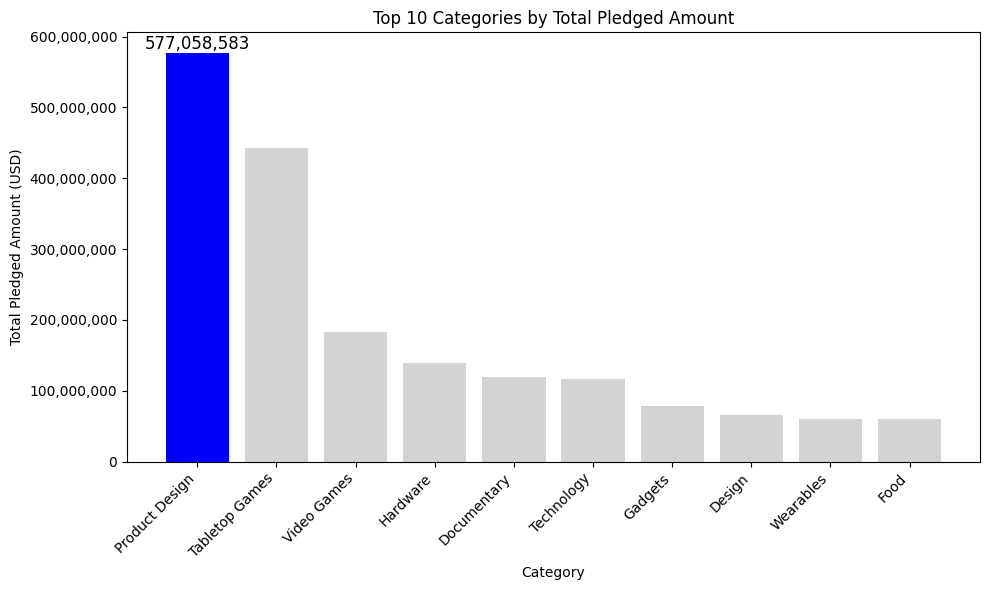

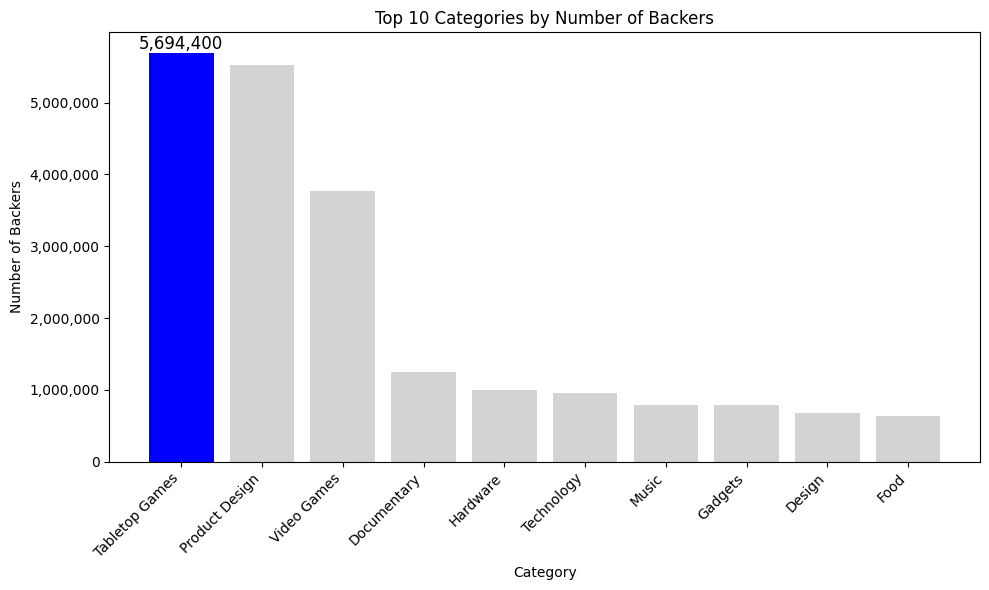

In [81]:
# 1. Top 10 Categories by Total Pledged Amount
plt.figure(figsize=(10, 6))
top_pledged = top_ten_cats.groupby('Category')['Usd Pledged Real'].sum().nlargest(10)

# Highlight the highest value in blue, others in light grey
colors = ['blue' if i == 0 else 'lightgrey' for i in range(len(top_pledged))]

plt.bar(top_pledged.index, top_pledged.values, color=colors)

# Add value only on the blue bar (the highest one)
plt.text(0, top_pledged.values[0], f'{top_pledged.values[0]:,.0f}', 
         ha='center', va='bottom', fontsize=12, color='black')

# Formatting for x-axis labels and title
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Categories by Total Pledged Amount')
plt.xlabel('Category')
plt.ylabel('Total Pledged Amount (USD)')

# Add comma formatting for y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.tight_layout()
plt.show()

# 2. Top 10 Categories by Number of Backers
plt.figure(figsize=(10, 6))
top_backers = top_ten_cats.groupby('Category')['Backers'].sum().nlargest(10)

# Highlight the highest value in blue, others in light grey
colors = ['blue' if i == 0 else 'lightgrey' for i in range(len(top_backers))]

plt.bar(top_backers.index, top_backers.values, color=colors)

# Add value only on the blue bar (the highest one)
plt.text(0, top_backers.values[0], f'{top_backers.values[0]:,.0f}', 
         ha='center', va='bottom', fontsize=12, color='black')

# Formatting for x-axis labels and title
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Categories by Number of Backers')
plt.xlabel('Category')
plt.ylabel('Number of Backers')

# Add comma formatting for y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.tight_layout()
plt.show()
